In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [54]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect = True)

In [57]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [61]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [74]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

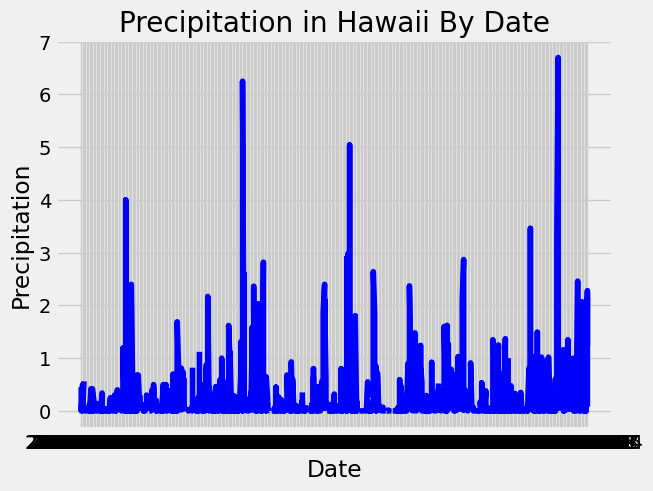

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
# ??? DONT PASS THE DATE AS A VARIABLE IN THE WEURY
query_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
query_date


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date > query_date).\
            order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
rows = [{"Date": result[0], "Precipitation": result[1]} for result in results]
rows
df = pd.DataFrame(rows).set_index("Date")
df


# Sort the dataframe by date
df_sorted = df.sort_values("Date", ascending = False)
df_sorted


# Use Pandas Plotting with Matplotlib to plot the data

#plt.figure(figsize=(16,8))
plt.plot(df_sorted.index.values, df_sorted["Precipitation"], color='b')
plt.title("Precipitation in Hawaii By Date")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()



In [100]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_agg = df_sorted.agg(["mean", "median", "var", "std", "sem"])
prcp_agg

,Precipitation
mean,0.176462
median,0.020000
var,0.211865
std,0.460288
sem,0.010254


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()